Importando Bibliotecas e Arquivo Questão 1

 <img src = "https://sasquadportador.blob.core.windows.net/general-images/header-blog-1.png" > 

# Seleção Estagiário Data Science - Jonathan Sales

###  QUESTÃO 1.1






Importações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dados_q1 = pd.read_csv('Questão 1 - Base.txt', delimiter='\t')

# Visualização geral com a função head

dados_q1.head(10)

ID_CONTA DT_VENCIMENTO DS_ROLAGEM  VL_FATURA
0    402467    2019-01-01        FX0     210.00
1    403001    2019-01-01        FX1    1097.18
2    403499    2019-01-01        FX0    1209.88
3    403670    2019-01-01        FX0     667.40
4    404183    2019-01-01        FX1    1239.52
5   1307735    2019-01-01        FX0     785.69
6   1307790    2019-01-01        FX0     266.00
7   1307824    2019-01-01        FX0     427.32
8   1307827    2019-01-01        FX0     103.68
9   1307835    2019-01-01        FX0     817.12

TIPOS DAS COLUNAS

In [2]:
dados_q1.info()

# Ao analisar percebi que a coluna "VL_FATURA" está corretamente como valor numérico
# O dataframe não apresenta valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728249 entries, 0 to 2728248
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID_CONTA       int64  
 1   DT_VENCIMENTO  object 
 2   DS_ROLAGEM     object 
 3   VL_FATURA      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.3+ MB


In [3]:
# Transformando os valores de "DT_VENCIEMNTO" em data

# dados_q1["DT_VENCIMENTO"] = datetime.strptime(dados_q1["DT_VENCIMENTO"], '%Y/%m/%d').date()

selecao = (dados_q1["DT_VENCIMENTO"] >= '2019-01-01') & (dados_q1["DT_VENCIMENTO"] <= '2019-02-10')

print(selecao)

j= 0

for i in selecao:
   if i == True:
    print(dados_q1["DT_VENCIMENTO"][j])
   j += 1

0           True
1           True
2           True
3           True
4           True
           ...  
2728244    False
2728245    False
2728246    False
2728247    False
2728248    False
Name: DT_VENCIMENTO, Length: 2728249, dtype: bool
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019-01-01
2019

Conferindo o primeiro e último mês do dataframe

In [4]:
print(min(dados_q1["DT_VENCIMENTO"]))

print(max(dados_q1["DT_VENCIMENTO"]))

2019-01-01
2019-09-23


Definindo uma função para calcular o percentual de XF1 por mês

In [5]:
def percent_by_mes_FX(mes):
    result = dados_q1['DT_VENCIMENTO'][pd.DatetimeIndex(
        dados_q1['DT_VENCIMENTO']).month.isin([mes])][dados_q1['DS_ROLAGEM'] == 'FX1']
    aux = dados_q1['DT_VENCIMENTO'][pd.DatetimeIndex(
        dados_q1['DT_VENCIMENTO']).month.isin([mes])]
    return 100*(len(result)/len(aux))

min_date = min(dados_q1['DT_VENCIMENTO'])
max_date = max(dados_q1['DT_VENCIMENTO'])

min_month = min_date.split('-')[1].lstrip('0')
max_month = max_date.split('-')[1].lstrip('0')


for month in range(int(min_month), int(max_month)+1):
    print(f"Percentual do mês {month}: ", f"{percent_by_mes_FX(month):.2f}%")

Percentual do mês 1:  7.29%
Percentual do mês 2:  8.90%
Percentual do mês 3:  10.88%
Percentual do mês 4:  8.39%
Percentual do mês 5:  10.04%
Percentual do mês 6:  8.53%
Percentual do mês 7:  9.61%
Percentual do mês 8:  9.06%
Percentual do mês 9:  8.54%


GRÁFICO PARA REPRESENTAR O PERCENTUAL DE FATURAS EMITIDAS POR MÊS, SEM PAGAR O MÊS ANTERIOR (FX1)

Text(0, 0.5, 'Percentual de faturas cujo mês anterior não foi pago (p/mês)')

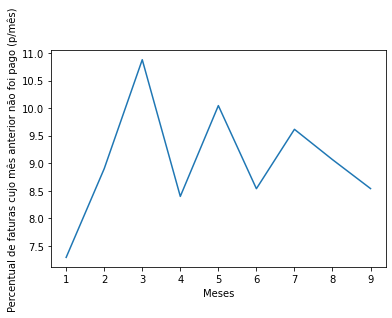

In [6]:
dados_q1["DT_VENCIMENTO"] = pd.to_datetime(dados_q1["DT_VENCIMENTO"])

mes = max(pd.DatetimeIndex(dados_q1['DT_VENCIMENTO']).month)


percent_FX1 = list(range(mes))

for i in percent_FX1:
    total = dados_q1[(pd.DatetimeIndex(dados_q1["DT_VENCIMENTO"]).month == i+1)]
    total_nao_pago = dados_q1[(pd.DatetimeIndex(dados_q1["DT_VENCIMENTO"]).month == i+1) & (dados_q1["DS_ROLAGEM"] == "FX1")]
    percent_FX1[i] = 100*len(total_nao_pago)/len(total)


fig, ax = plt.subplots()  # Figura com um eixo
ax.plot([1,2,3,4,5,6,7,8,9], percent_FX1)  # Colocando os números dos meses nos eixos

plt.xlabel("Meses")
plt.ylabel("Percentual de faturas cujo mês anterior não foi pago (p/mês)")

In [7]:
dados_q1.head()

ID_CONTA DT_VENCIMENTO DS_ROLAGEM  VL_FATURA
0    402467    2019-01-01        FX0     210.00
1    403001    2019-01-01        FX1    1097.18
2    403499    2019-01-01        FX0    1209.88
3    403670    2019-01-01        FX0     667.40
4    404183    2019-01-01        FX1    1239.52